In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

In [16]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [17]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [18]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [19]:
df_jobs.merge(df_companies, on="company_name")

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [20]:
df_software = pd.read_csv("https://lukeb.co/software_csv", index_col="job_posted_month")
df_software

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [21]:
df_france = df[df.job_country == "France"].copy()
df_france["job_posted_month"] = df_france.job_posted_date.dt.strftime("%B")
df_france_pivot = df_france.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")
df_france_pivot.reset_index(inplace=True)
df_france_pivot["month_number"] = pd.to_datetime(df_france_pivot.job_posted_month, format="%B").dt.month
df_france_pivot.sort_values("month_number", inplace=True)
df_france_pivot.set_index("job_posted_month", inplace=True)
df_france_pivot.drop(columns="month_number", inplace=True)
df_france_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,39,22,1549,1416,1340,33,105,173,128,106
February,66,32,1556,1194,954,30,86,120,95,93
March,54,25,1546,1128,1026,31,85,114,99,97
April,66,21,1455,997,953,19,73,102,89,98
May,47,10,1141,861,726,23,58,116,67,47
June,33,20,1224,1004,797,34,60,95,71,88
July,45,17,1107,728,638,24,52,101,68,62
August,38,25,957,720,661,29,68,80,99,86
September,63,25,755,685,545,28,46,82,83,79


In [22]:
df_merged = df_france_pivot.merge(df_software, on="job_posted_month")
df_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,39,22,1549,1416,1340,33,105,173,128,106,13619,9827,5108,4348
February,66,32,1556,1194,954,30,86,120,95,93,11456,9116,7298,4284
March,54,25,1546,1128,1026,31,85,114,99,97,11102,8178,5814,4159
April,66,21,1455,997,953,19,73,102,89,98,14037,9209,7232,4220
May,47,10,1141,861,726,23,58,116,67,47,12126,8864,6718,4980
June,33,20,1224,1004,797,34,60,95,71,88,12003,8065,5902,4781
July,45,17,1107,728,638,24,52,101,68,62,11914,8061,6839,4344
August,38,25,957,720,661,29,68,80,99,86,11571,8191,7413,4104
September,63,25,755,685,545,28,46,82,83,79,14016,8447,6139,4094


In [23]:
#Finding top 5 jobs
top5 = df_merged.sum().sort_values(ascending=False).head().index.to_list()
top5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst']

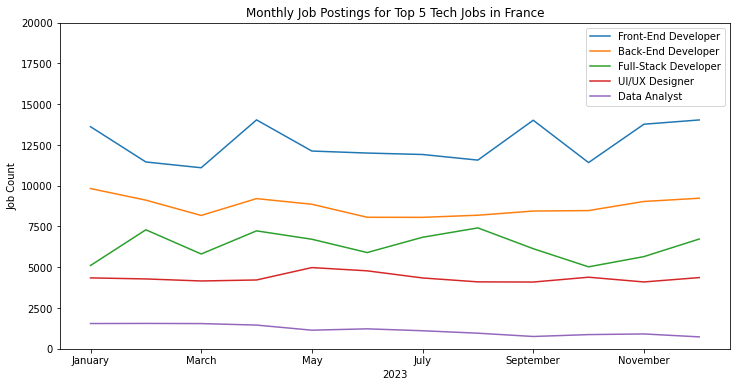

In [24]:
df_merged[top5].plot(kind="line", figsize=(12,6))
plt.title("Monthly Job Postings for Top 5 Tech Jobs in France")
plt.ylabel("Job Count")
plt.xlabel("2023")
plt.ylim(0, 20_000)
plt.legend()
plt.show()

In [25]:
#Finding Data Analyst Jobs in months. And show if its senior.

#take only data analyst jobs
df_DA = df[df.job_title_short == "Data Analyst"].copy()

#split them into months
df_DA["month"] = df_DA.job_posted_date.dt.month

#group them by month and  then, count job_title_short
df_DA_pivot = df_DA.pivot_table(index="month", aggfunc="count")["job_title_short"]
df_DA_pivot


month
1     23585
2     16558
3     16243
4     15514
5     13423
6     16008
7     16095
8     18628
9     14969
10    16239
11    15230
12    13583
Name: job_title_short, dtype: int64

In [26]:
#Same process, but now look for Senior Data Analyst


df_SDA = df[df.job_title_short == "Senior Data Analyst"].copy()

df_SDA["month"] = df_SDA.job_posted_date.dt.month

df_SDA_pivot = df_SDA.pivot_table(index="month", aggfunc="count")["job_title_short"]
df_SDA_pivot

month
1     3696
2     2713
3     2454
4     2351
5     1925
6     2319
7     2380
8     2951
9     2194
10    2317
11    2117
12    1799
Name: job_title_short, dtype: int64

In [27]:
#merge them

merged_pivot = pd.merge(df_DA_pivot, df_SDA_pivot, how='outer', left_index=True, right_index=True)
merged_pivot.columns = ['DA_count', 'SDA_count']
merged_pivot

,DA_count,SDA_count
month,,
1,23585,3696
2,16558,2713
3,16243,2454
4,15514,2351
5,13423,1925
6,16008,2319
7,16095,2380
8,18628,2951
9,14969,2194
